In [1]:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data=pd.read_csv("website_performance.csv")

Data Exploration and Cleaning:

In [3]:
data.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
# Checking for missing values:
data.isnull().sum()

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64

In [6]:
# Shape of the data
data.shape

(12, 4)

In [7]:
# Data Summary
data.describe()

,Page_Load_Time,Bounce_Rate,Conversion_Rate
count,12.000000,12.000000,12.000000
mean,5.866266,0.452650,0.060056
std,2.288288,0.086482,0.014993
min,2.468395,0.301692,0.038263
25%,4.165375,0.389651,0.048626
50%,5.621936,0.477238,0.059957
75%,7.457142,0.517399,0.065832
max,9.872398,0.566843,0.089525


In [8]:
data['Month'] = pd.to_datetime(data['Month'])
# data.set_index('Month', inplace=True)
data

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525
5,2023-06-01,7.333456,0.440715,0.048687
6,2023-07-01,3.372264,0.390081,0.048440
7,2023-08-01,7.115272,0.489165,0.038263
8,2023-09-01,8.384957,0.301692,0.063365
9,2023-10-01,2.468395,0.566843,0.065971


Outliers

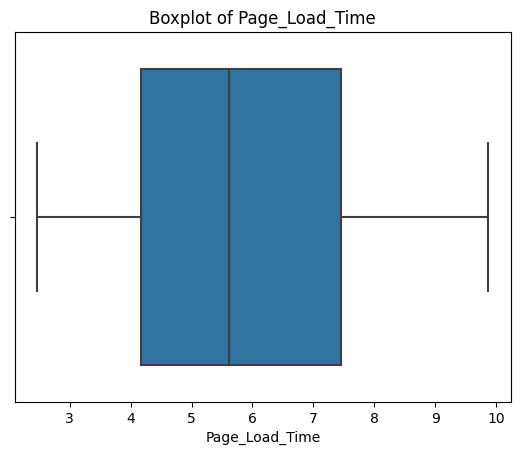

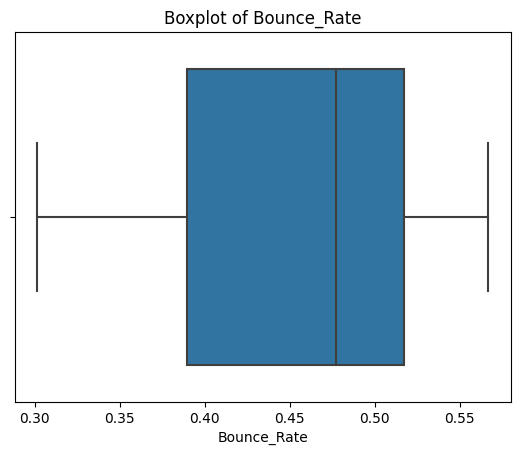

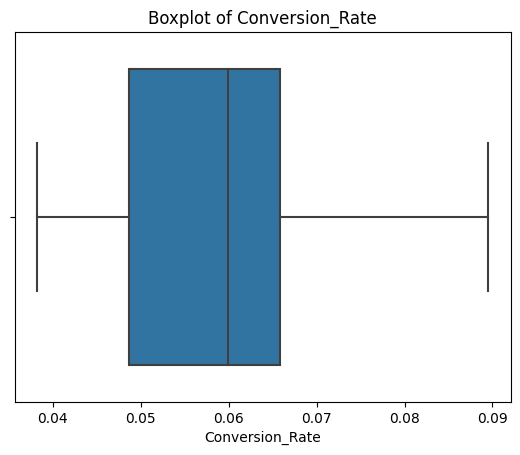

In [9]:
# Visualizing the distribution of Page_Load_Time
sns.boxplot(x=data['Page_Load_Time'])
plt.xlabel('Page_Load_Time')
plt.title('Boxplot of Page_Load_Time')
plt.show()

# Visualizing the distribution of Page_Load_Time
sns.boxplot(x=data['Bounce_Rate'])
plt.xlabel('Bounce_Rate')
plt.title('Boxplot of Bounce_Rate')
plt.show()

# Visualizing the distribution of Page_Load_Time
sns.boxplot(x=data['Conversion_Rate'])
plt.xlabel('Conversion_Rate')
plt.title('Boxplot of Conversion_Rate')
plt.show()


User Behavior Analysis:


In [10]:
# Average time spent on each page
average_time_per_page = data[['Page_Load_Time']].mean()
print("\nAverage time spent on each page:")
print(average_time_per_page)



Average time spent on each page:
Page_Load_Time    5.866266
dtype: float64


In [11]:
# Click-through rate for different sections
click_through_rate = data[['Bounce_Rate', 'Conversion_Rate']].apply(lambda x: 1 - x)
click_through_rate.rename(columns={'Bounce_Rate': 'Click_Through_Rate', 'Conversion_Rate': 'Conversion_Rate'}, inplace=True)
print("\nClick-through rate for different sections:")
print(click_through_rate)



Click-through rate for different sections:
    Click_Through_Rate  Conversion_Rate
0             0.485655         0.952625
1             0.682843         0.937236
2             0.519097         0.949486
3             0.526428         0.942849
4             0.457593         0.910475
5             0.559285         0.951313
6             0.609919         0.951560
7             0.510835         0.961737
8             0.698308         0.936635
9             0.433157         0.934029
10            0.473440         0.934214
11            0.611636         0.917172


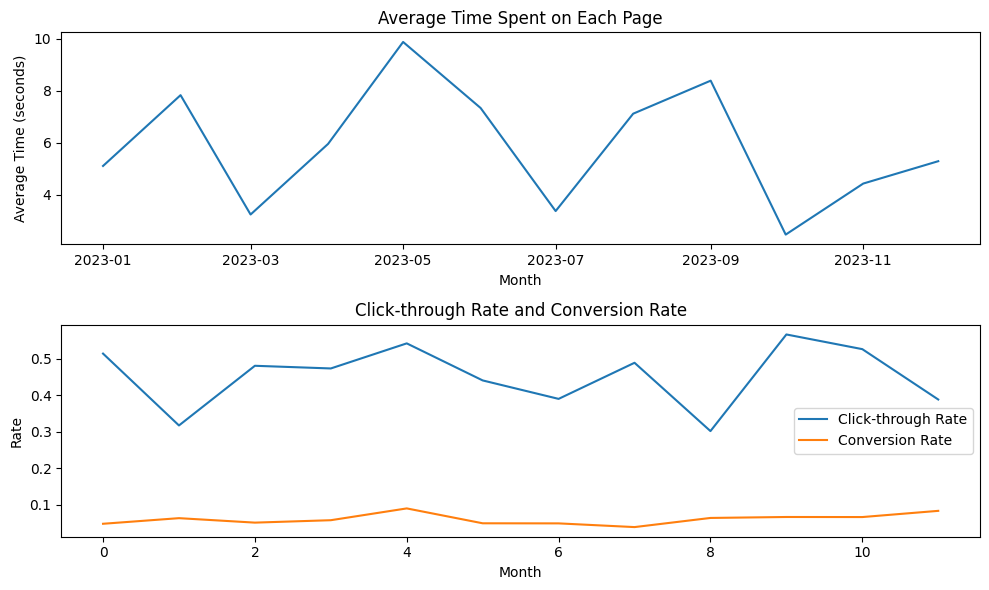

In [12]:


# Visualizations
plt.figure(figsize=(10, 6))

# Line plot for Average time spent on each page
plt.subplot(2, 1, 1)
sns.lineplot(x='Month', y='Page_Load_Time', data=data)
plt.title('Average Time Spent on Each Page')
plt.xlabel('Month')
plt.ylabel('Average Time (seconds)')

# Line plot for Click-through rate and Conversion rate
plt.subplot(2, 1, 2)
sns.lineplot(x=data.index, y='Bounce_Rate', data=data, label='Click-through Rate')
sns.lineplot(x=data.index, y='Conversion_Rate', data=data, label='Conversion Rate')
plt.title('Click-through Rate and Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.legend()
plt.tight_layout()
plt.show()



Highest Page Load Time:
Month                      2023-05-01 00:00:00
Page_Load_Time                        9.872398
Bounce_Rate                           0.542407
Conversion_Rate                       0.089525
Overall_Conversion_Rate               0.009068
Name: 4, dtype: object


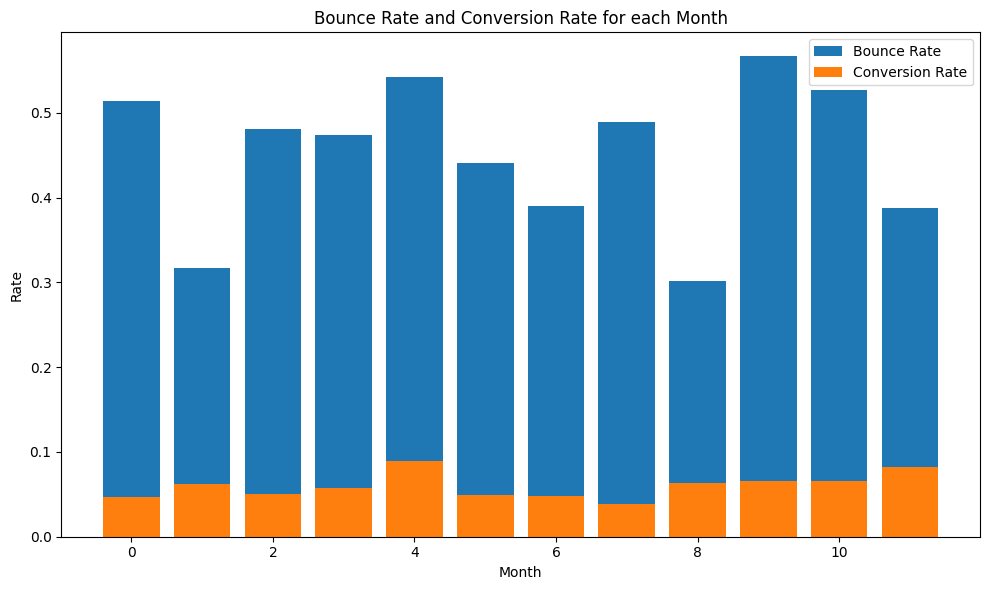

In [13]:

# Calculate overall conversion rate based on page load-time
data['Overall_Conversion_Rate'] = data['Conversion_Rate'] / data['Page_Load_Time']

# Identify the highest page_load_time and month
highest_page_load_time = data.loc[data['Page_Load_Time'].idxmax()]
print("\nHighest Page Load Time:")
print(highest_page_load_time)

# Explore the relationship between the number of interactions and Bounce_Rate, Conversion_Rate
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Bounce_Rate'], label='Bounce Rate')
plt.bar(data.index, data['Conversion_Rate'], label='Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.title('Bounce Rate and Conversion Rate for each Month')
plt.legend()
plt.tight_layout()
plt.show()

Cohort Analysis:


C:\Users\sai20\AppData\Local\Temp\ipykernel_11656\3106411823.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cohort_group = cohort_group.groupby('Month').apply(calculate_retention_rate)


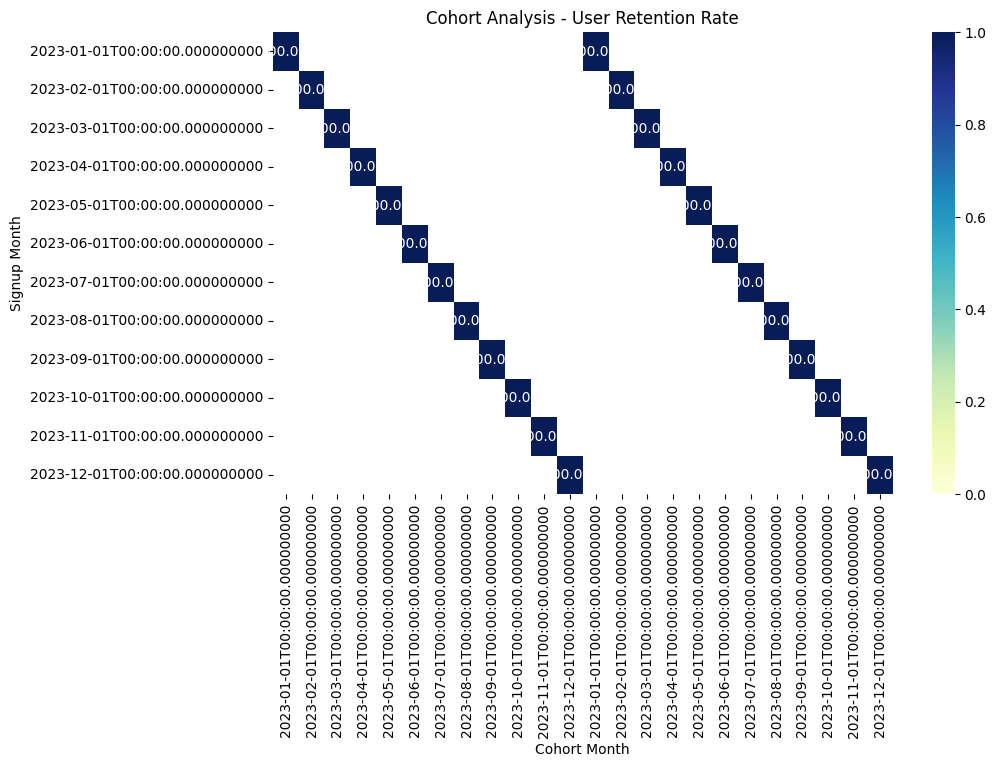

In [14]:

# Perform cohort analysis based on user sign-up dates (Month)
# Calculate the retention rate for each month cohort
def calculate_retention_rate(cohort):
    cohort_size = cohort.iloc[0]['Total_Customers']
    cohort['Retention_Rate'] = cohort['Total_Customers'] / cohort_size
    return cohort

# Group the data by the first month (cohort) and calculate the total number of customers for each cohort
cohort_group = data.groupby('Month')['Month'].count().reset_index(name='Total_Customers')

# Calculate the retention rate for each cohort
cohort_group = cohort_group.groupby('Month').apply(calculate_retention_rate)

# Create a pivot table to display the retention rates
cohort_pivot = cohort_group.pivot_table(index='Month', columns='Month', values='Retention_Rate')

# Plot the cohort analysis
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_pivot, annot=True, cmap='YlGnBu', fmt='.1%', vmin=0, vmax=1)
plt.title('Cohort Analysis - User Retention Rate')
plt.xlabel('Cohort Month')
plt.ylabel('Signup Month')
plt.show()

In [15]:
data['LTV'] = data['Conversion_Rate'] * 100  # Assuming the LTV is calculated based on Conversion_Rate

# Display the DataFrame with LTV
print("\nData with Lifetime Value (LTV):")
print(data)


Data with Lifetime Value (LTV):
        Month  Page_Load_Time  Bounce_Rate  Conversion_Rate  \
0  2023-01-01        5.106652     0.514345         0.047375   
1  2023-02-01        7.828199     0.317157         0.062764   
2  2023-03-01        3.239983     0.480903         0.050514   
3  2023-04-01        5.954509     0.473572         0.057151   
4  2023-05-01        9.872398     0.542407         0.089525   
5  2023-06-01        7.333456     0.440715         0.048687   
6  2023-07-01        3.372264     0.390081         0.048440   
7  2023-08-01        7.115272     0.489165         0.038263   
8  2023-09-01        8.384957     0.301692         0.063365   
9  2023-10-01        2.468395     0.566843         0.065971   
10 2023-11-01        4.429745     0.526560         0.065786   
11 2023-12-01        5.289363     0.388364         0.082828   

    Overall_Conversion_Rate       LTV  
0                  0.009277  4.737525  
1                  0.008018  6.276389  
2                  0.015591

Website Performance Optimization:


In [16]:

# Calculate website performance metrics
average_page_load_time = data['Page_Load_Time'].mean()
average_bounce_rate = data['Bounce_Rate'].mean()
average_conversion_rate = data['Conversion_Rate'].mean()

# Print the calculated metrics
print("Average Page Load Time:", average_page_load_time)
print("Average Bounce Rate:", average_bounce_rate)
print("Average Conversion Rate:", average_conversion_rate)

# Propose strategies to reduce bounce rate and improve conversion rate
# For example, A/B testing, improving website content, optimizing page load time, etc.

# Create a visualization dashboard to monitor website performance in real-time
fig = px.line(data, x='Month', y=['Page_Load_Time', 'Bounce_Rate', 'Conversion_Rate'],
              labels={'value': 'Rate', 'variable': 'Metric'},
              title='Website Performance Metrics Over Time')
fig.update_layout(xaxis_title='Month', yaxis_title='Rate')
fig.show()

Average Page Load Time: 5.866266048900847
Average Bounce Rate: 0.4526503154628032
Average Conversion Rate: 0.060055897097265006
